In [1]:
#Adding Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import os
import datetime

In [2]:
#Import both excel files
culture_df = pd.read_csv('cleaned_date_culture_data.csv')
dna_df = pd.read_csv('Cleaned_Date_Dna_Data.csv')

In [3]:
#establish thresholds for the readings to "closure levels"
#https://data.cityofchicago.org/Parks-Recreation/Beach-Lab-Data/2ivx-z93u/

#Culture Threshold (CFU Colony Forming Units/ 100 ml of water)
culture_thresh = 235

#DNA Threshold (CCE calibrator Cell equivalents / 100 ml of water)
dna_thresh = 1000

In [4]:
#filter existing Dataframes to remove all acceptable days
#Assume that the Mean was used for threshold analysis
#Culture
closure_cult_df = culture_df[culture_df["Culture Reading Mean"] >= culture_thresh]

#DNA
closure_dna_df = dna_df[dna_df["DNA Reading Mean"] >= dna_thresh]

In [5]:
#test
closure_cult_df.head()

,Unnamed: 0,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude,Sample Date,Sample Time
1,2374,112689.0,2016-06-01 07:15:00,Calumet,629.0,1300.0,904.3,41.7142,-87.5299,2016-06-01,07:15:00
2,2375,112669.0,2016-06-01 08:00:00,Calumet,345.0,517.0,422.3,41.7142,-87.5299,2016-06-01,08:00:00
4,4983,93134.0,2015-07-07 00:00:00,Leone,727.0,727.0,727.0,42.0131,-87.6635,2015-07-07,00:00:00
13,4993,105382.0,2014-07-15 00:00:00,63rd Street,1414.0,1300.0,1355.8,41.7827,-87.5748,2014-07-15,00:00:00
18,4999,95242.0,2015-06-02 00:00:00,South Shore,291.0,328.0,308.9,41.7689,-87.5636,2015-06-02,00:00:00


In [6]:
#test
closure_dna_df.head()

,Unnamed: 0,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Sample Date,Sample Time
39,53,13778.0,2020-07-08 00:00:00,Oak Street,2560.0,3001.0,2771.7,41.9032,-87.6235,2020-07-08,00:00:00
40,54,13785.0,2020-07-06 12:52:00,North Avenue,1651.0,1928.0,1784.1,41.9148,-87.6273,2020-07-06,12:52:00
50,64,13800.0,2020-07-06 12:51:00,South Shore,930.0,2143.0,1411.7,41.7689,-87.5636,2020-07-06,12:51:00
58,72,13797.0,2020-07-08 00:00:00,North Avenue,1651.0,1928.0,1784.1,41.9148,-87.6273,2020-07-08,00:00:00
59,73,13774.0,2020-07-08 00:00:00,South Shore,930.0,2143.0,1411.7,41.7689,-87.5636,2020-07-08,00:00:00


In [7]:
closure_dna_df["Sample Month"]= ""



<ipython-input-7-cb0dbec98916>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closure_dna_df["Sample Month"]= ""


In [8]:
closure_cult_df["Sample Month"]=""

<ipython-input-8-1015df23f19a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closure_cult_df["Sample Month"]=""


In [9]:
closure_dna_df["Sample Month"]= pd.DatetimeIndex(closure_dna_df["Sample Date"]).month
closure_dna_df.head()

<ipython-input-9-dc6b9ff97e9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closure_dna_df["Sample Month"]= pd.DatetimeIndex(closure_dna_df["Sample Date"]).month


,Unnamed: 0,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Sample Date,Sample Time,Sample Month
39,53,13778.0,2020-07-08 00:00:00,Oak Street,2560.0,3001.0,2771.7,41.9032,-87.6235,2020-07-08,00:00:00,7
40,54,13785.0,2020-07-06 12:52:00,North Avenue,1651.0,1928.0,1784.1,41.9148,-87.6273,2020-07-06,12:52:00,7
50,64,13800.0,2020-07-06 12:51:00,South Shore,930.0,2143.0,1411.7,41.7689,-87.5636,2020-07-06,12:51:00,7
58,72,13797.0,2020-07-08 00:00:00,North Avenue,1651.0,1928.0,1784.1,41.9148,-87.6273,2020-07-08,00:00:00,7
59,73,13774.0,2020-07-08 00:00:00,South Shore,930.0,2143.0,1411.7,41.7689,-87.5636,2020-07-08,00:00:00,7


In [28]:
closure_cult_df["Sample Month"]= pd.DatetimeIndex(closure_cult_df["Sample Date"]).month
closure_cult_df.head()

<ipython-input-28-a4c1dc6707e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closure_cult_df["Sample Month"]= pd.DatetimeIndex(closure_cult_df["Sample Date"]).month


,Unnamed: 0,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude,Sample Date,Sample Time,Sample Month
1,2374,112689.0,2016-06-01 07:15:00,Calumet,629.0,1300.0,904.3,41.7142,-87.5299,2016-06-01,07:15:00,6
2,2375,112669.0,2016-06-01 08:00:00,Calumet,345.0,517.0,422.3,41.7142,-87.5299,2016-06-01,08:00:00,6
4,4983,93134.0,2015-07-07 00:00:00,Leone,727.0,727.0,727.0,42.0131,-87.6635,2015-07-07,00:00:00,7
13,4993,105382.0,2014-07-15 00:00:00,63rd Street,1414.0,1300.0,1355.8,41.7827,-87.5748,2014-07-15,00:00:00,7
18,4999,95242.0,2015-06-02 00:00:00,South Shore,291.0,328.0,308.9,41.7689,-87.5636,2015-06-02,00:00:00,6


In [29]:

cl_cult_group=closure_cult_df.groupby("Sample Month")["Culture Test ID"].count()
print(cl_cult_group)
cl_cult_group_df=pd.DataFrame(cl_cult_group)
cl_cult_group_df

Sample Month
5    161
6    515
7    659
8    719
9     62
Name: Culture Test ID, dtype: int64


,Culture Test ID
Sample Month,
5,161
6,515
7,659
8,719
9,62


In [30]:
cl_dna_group=closure_dna_df.groupby("Sample Month")["DNA Test ID"].count()
print(cl_dna_group)
cl_dna_group_df=pd.DataFrame(cl_dna_group)
cl_dna_group_df


Sample Month
5     28
6    156
7    289
8    182
9     21
Name: DNA Test ID, dtype: int64


,DNA Test ID
Sample Month,
5,28
6,156
7,289
8,182
9,21


In [13]:
#closure counts per month

In [14]:
#set up bins for the months of the year
#bins would be equivalent for both, reading timestamps the same

month_labels = [ "January",
              "February",
              "March",
              "April",
              "May",
              "June",
              "July",
              "August",
              "September",
              "October",
              "November",
              "December"]

summer_labels= ["May",
              "June",
              "July",
              "August",
              "September"]

Text(0, 0.5, 'Days exceeding Threshold')

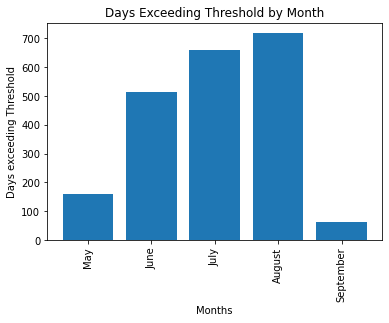

In [15]:
x_axis=np.arange(len(cl_cult_group_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis,cl_cult_group_df["Culture Test ID"])
plt.xticks(tick_locations,summer_labels,rotation = "vertical")
plt.title("Days Exceeding Threshold by Month")
plt.xlabel("Months")
plt.ylabel("Days exceeding Threshold")

Text(0, 0.5, 'Days exceeding Threshold')

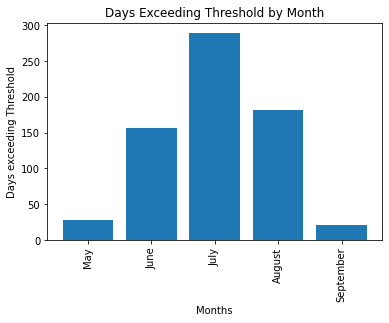

In [16]:
#DNA Graph
# (uses x_axis and tick from above)
    
plt.bar(x_axis,cl_dna_group_df["DNA Test ID"])
plt.xticks(tick_locations,summer_labels,rotation = "vertical")
plt.title("Days Exceeding Threshold by Month")
plt.xlabel("Months")
plt.ylabel("Days exceeding Threshold")

In [49]:
#Additional Stats - Find Average Level above threshold
cl_cult_mean=closure_cult_df.groupby("Sample Month")["Culture Reading Mean"].mean()
print(cl_cult_mean)
cl_cult_mean_df=pd.DataFrame(cl_cult_mean)
cl_cult_mean_df
cl_cult_mean_df["Mean CFU level above Threshold"] = cl_cult_mean_df["Culture Reading Mean"]-culture_thresh
cl_cult_mean_df

Sample Month
5    930.657764
6    780.439223
7    808.103187
8    745.955633
9    752.185484
Name: Culture Reading Mean, dtype: float64


,Culture Reading Mean,Mean CFU level above Threshold
Sample Month,,
5,930.657764,695.657764
6,780.439223,545.439223
7,808.103187,573.103187
8,745.955633,510.955633
9,752.185484,517.185484


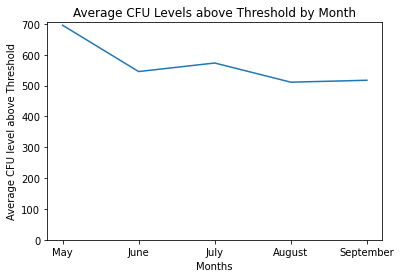

In [44]:
#Line graph showing levels above threshold in each month
x_axis = [0,1,2,3,4]
points = cl_cult_mean_df["Mean CFU level above Threshold"]
plt.plot(x_axis, points)
plt.xticks(np.arange(5), summer_labels)
plt.yticks(np.arange(0,800,100))

plt.xlabel("Months")
plt.ylabel("Average CFU level above Threshold")
plt.title("Average CFU Levels above Threshold by Month")
plt.show()

In [50]:
#Additional Stats - Find Average Level above threshold
cl_dna_mean=closure_dna_df.groupby("Sample Month")["DNA Reading Mean"].mean()
print(cl_dna_mean)
cl_dna_mean_df=pd.DataFrame(cl_dna_mean)
cl_dna_mean_df

cl_dna_mean_df["Mean CCE level above Threshold"] = cl_dna_mean_df["DNA Reading Mean"]-dna_thresh
cl_dna_mean_df

Sample Month
5    2463.157143
6    4273.587821
7    3168.998616
8    4799.155495
9    2513.985714
Name: DNA Reading Mean, dtype: float64


,DNA Reading Mean,Mean CCE level above Threshold
Sample Month,,
5,2463.157143,1463.157143
6,4273.587821,3273.587821
7,3168.998616,2168.998616
8,4799.155495,3799.155495
9,2513.985714,1513.985714


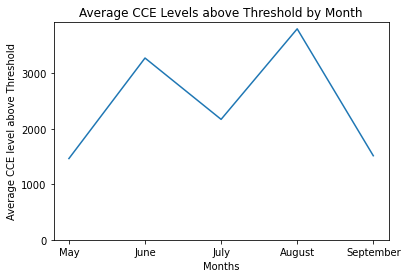

In [51]:
#Line graph showing levels above threshold in each month
x_axis = [0,1,2,3,4]
points = cl_dna_mean_df["Mean CCE level above Threshold"]
plt.plot(x_axis, points)
plt.xticks(np.arange(5), summer_labels)
plt.yticks(np.arange(0,4000,1000))

plt.xlabel("Months")
plt.ylabel("Average CCE level above Threshold")
plt.title("Average CCE Levels above Threshold by Month")
plt.show()